In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
## Import Data

In [2]:
df_freetrade = pd.read_csv('/Users/hughdaman/Desktop/freetrade.csv')

In [6]:
def download_gme_data():
    """
    Downloads GME stock data from the start of 2021 using yfinance.
    """
    # Define the ticker symbol and the period
    ticker = 'GME'
    start_date = '2021-01-01'
    
    # Download the data
    gme_data = yf.download(ticker, start=start_date)
    
    return gme_data


In [10]:
# Download GME data and store in a variable
gme_price = download_gme_data()

# Display the first few rows of the data
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2021-01-04  4.7500  4.7750  4.2875  4.3125     4.3125  40090000
2021-01-05  4.3375  4.5200  4.3075  4.3425     4.3425  19846000
2021-01-06  4.3350  4.7450  4.3325  4.5900     4.5900  24224800
2021-01-07  4.6175  4.8625  4.5050  4.5200     4.5200  24517200
2021-01-08  4.5450  4.5750  4.2700  4.4225     4.4225  25928000


In [11]:
## Process Data

In [18]:
df_gme = df_freetrade[df_freetrade['Ticker']=='GME']
df_gme

,Title,Type,Timestamp,Account Currency,Total Amount,Buy / Sell,Ticker,ISIN,Price per Share in Account Currency,Stamp Duty,...,FX Fee (BPS),FX Fee Amount,Dividend Ex Date,Dividend Pay Date,Dividend Eligible Quantity,Dividend Amount Per Share,Dividend Gross Distribution Amount,Dividend Net Distribution Amount,Dividend Withheld Tax Percentage,Dividend Withheld Tax Amount
0,GameStop,ORDER,2024-06-11T18:15:59.265Z,GBP,65.28,BUY,GME,US36467W1099,21.633333,0.0,...,59.0,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GameStop,ORDER,2024-06-10T15:31:01.226Z,GBP,39.53,BUY,GME,US36467W1099,19.650000,0.0,...,59.0,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GameStop,ORDER,2024-06-07T19:56:33.407Z,GBP,22.40,BUY,GME,US36467W1099,22.270000,0.0,...,59.0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GameStop,ORDER,2024-06-07T17:15:53.579Z,GBP,64.06,BUY,GME,US36467W1099,21.226667,0.0,...,59.0,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GameStop,ORDER,2024-06-07T17:04:54.706Z,GBP,68.82,BUY,GME,US36467W1099,22.806667,0.0,...,59.0,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,GameStop,ORDER,2021-05-27T14:12:04.736Z,GBP,49.92,BUY,GME,US36467W1099,174.539063,0.0,...,45.0,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,GameStop,ORDER,2021-05-27T13:48:42.921Z,GBP,36.95,BUY,GME,US36467W1099,164.479318,0.0,...,45.0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,GameStop,ORDER,2021-05-19T14:04:06.720Z,GBP,49.91,BUY,GME,US36467W1099,122.407246,0.0,...,45.0,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,GameStop,ORDER,2021-05-14T14:13:03.875Z,GBP,149.77,BUY,GME,US36467W1099,115.467035,0.0,...,45.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def extract_date_from_timestamp(df, column_name):
    """
    Extracts the date part from a datetime column in a dataframe.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the datetime column.
    column_name (str): The name of the datetime column.
    
    Returns:
    pd.DataFrame: The dataframe with an additional column for the date part.
    """
    # Convert the datetime column to datetime objects and extract the date part
    df['DatePart'] = pd.to_datetime(df[column_name]).dt.date
    return df

# Example datetime string
df_gme = extract_date_from_timestamp(df_gme, 'Timestamp')

/var/folders/zj/z8yx0rhn5clg0pdrp671ykmm0000gn/T/ipykernel_2646/742350579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DatePart'] = pd.to_datetime(df[column_name]).dt.date


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

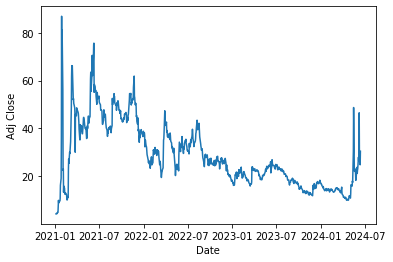

In [20]:
sns.lineplot(data=gme_data, x='Date',y='Adj Close')

In [22]:
print(df_gme[df_gme['Buy / Sell'] == 'BUY']['Total Amount'].sum())

6599.5199999999995


In [23]:
print(df_gme[df_gme['Buy / Sell'] == 'SELL']['Total Amount'].sum())

1913.6200000000001


In [24]:
print(df_gme[df_gme['Buy / Sell'] == 'BUY']['Total Amount'].sum() - df_gme[df_gme['Buy / Sell'] == 'SELL']['Total Amount'].sum())

4685.9


In [25]:
print(4685.9-4127.12)

558.7799999999997
